# Altair-catplot

A utility to use Altair to generate box plots, jitter plots, and ECDFs, i.e. plots with a categorical variable where a data transformation not covered in Altair is required.

## Motivation

[Altair](https://altair-viz.github.io) is a Python interface for [Vega-Lite](http://vega.github.io/vega-lite). The resulting plots are easily displayed in JupyterLab and/or exported. The grammar of Vega-Lite which is largely present in Altair is well-defined, well-documented, and clear. This is one of many strong features of Altair and Vega-Lite.

There is always a trade-off when using high level plotting libraries. You can rapidly make plots, but they are less configurable. The developers of Altair have (wisely, in my opinion) adhered to the grammar of Vega-Lite. If Vega-Lite does not have a feature, Altair does not try to add it.

The developers of Vega-Lite have an [have plans to add more functionality](https://github.com/vega/vega-lite/pull/4096/files). Indeed, in the soon to be released (as of August 23, 2018) Vega-Lite 3.0, box plots are included. Adding a jitter transform is also planned. It would be useful to be able to conveniently make jitter and box plots with the current features of Vega-Lite and Altair. I wrote Altair-catplot to fill in this gap until the functionality is implemented in Vega-Lite and Altair.

The box plots and jitter plots I have in mind apply to the case where one axis is quantitative and the other axis is nominal or ordinal (that is, categorical). So, we are making plots with one categorical variable and one quantitative. Hence the name, Altair-catplot.

## Installation

You can install altair-catplot using pip. You will need to have a recent version of Altair and all of its dependencies installed.

    pip install altair_catplot

## Usage

I will import Altair-catplot as `altcat`, and while I'm at it will import the other modules we need.

In [1]:
import numpy as np
import pandas as pd

import altair as alt
import altair_catplot as altcat

Every plot is made using the `altcat.catplot()` function. It has the following call signature.

```python
catplot(data=None,
        height=Undefined,
        width=Undefined, 
        mark=Undefined,
        encoding=Undefined,
        transform=None,
        sort=Undefined,
        jitter_width=0.2,
        box_mark=Undefined,
        whisker_mark=Undefined,
        box_overlay=False,
        **kwargs)
```

The `data`, `mark`, `encoding`, and `transform` arguments must all be provided. The `data`, `mark`, and `encoding` fields are as for `alt.Chart()`. Note that these are specified as constructor attributes, not as you would using Altair's more idiomatic methods like `mark_point()`, `encode()`, etc.

In this package, I consider a box plot, jitter plot, or ECDF to be transforms of the data, as they are constructed by performing some aggegration of transformation to the data. The exception is for a box plot, since in Vega-Lite 3.0+'s specification for box plots, where `boxplot` is a mark.

The utility is best shown by example, so below I present several.

## Sample data

To demonstrate usage, I will first create a data frame with sample data for plotting.

In [2]:
np.random.seed(4288233)

data = {'data ' + str(i): np.random.normal(*musig, size=50) 
            for i, musig in enumerate(zip([0, 1, 2, 3], [1, 1, 2, 3]))}

df = pd.DataFrame(data=data).melt()
df['dummy metadata'] = np.random.choice(['poodle', 'beagle', 'collie', 'dalmation', 'terrier'],
                                        size=len(df))

df.head()

,variable,value,dummy metadata
0,data 0,1.980946,collie
1,data 0,-0.442286,dalmation
2,data 0,1.093249,terrier
3,data 0,-0.233622,collie
4,data 0,-0.799315,dalmation


The categorical variable is `'variable'` and the quantitative variable is `'value'`.

## Box plot

We can create a box plot as follows. Note that the mark is a string specifying a box plot (as will be in the future with Altair), and the encoding is specified as a dictionary of key-value pairs.

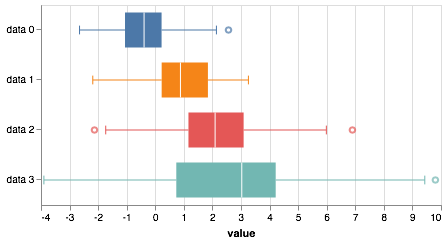

In [3]:
altcat.catplot(df,
               mark='boxplot',
               encoding=dict(x='value:Q',
                             y=alt.Y('variable:N', title=None),
                             color=alt.Color('variable:N', legend=None)))

This box plot can be generated in future editions of Altair after Vega-Lite 3.0 is formally released as follows.

```python
alt.Chart(df
    ).mark_boxplot(
    ).encode(
        x='value:Q',
        y=alt.Y('variable:N', title=None),
        color=alt.Color('variable:N', legend=None)
    )
```

The resulting plot looks different from what I have shown here, using instead the Vega-Lite defaults. Specifically, the whiskers are black and do not have caps, and the boxes are thinner. You can check it out [here](https://vega.github.io/editor/#/url/vega-lite/N4KABGBEDGD2B2AzAlgc0gLjKCFIDdkBTAd023FzwAsi1qAXcgZgAZWAaSqyE5AEwbVyAFnbcwAX0qSuefgEMGC8jlyR4CgLZFykRcoC0AdgVFExkQEYAHPwCczAKzRjT5vwfvERMdABGIk7GVtCQMnJQBgoAzkQMMaoS+koKJmYW1naOLm4eXsw+foHBoeQA2hIQalR4+AoANgCuulhWAHT2Nqz2IgBsVszGAEzDxjbMfU6RtVD1AE7ICv4NrVGpYKzhs7JVFLN1jS3khqztIiKjNsHMVvZWfff2rH0ztQQKi8uretGb27VdrMau96s01h0esxhiIbH1hn1ETYbMY+jY3jwFksVmsUsp-nsgbUQZijmtTu1hsxJsMrMZmN17iMnOi9ocvjjfhstoSMfsDh9wSczsZ7I4rE5aTDhsEnCJmHz2diflg8QoCTs+ST1GDjlgKTkxTKJiJDVZFXNPsrcX8eZq9trDkKsGcrDL+rC0S8rKxoQyLR8OSr1vi7YCtWzLc6wBSbEE0XdTU46fK+iIA1jvjbuQCqESqI6o3qwB03WJmJc+vSfcjxhmrVmuaHc7h87hC4Li4YOpdqY9TQinGKa-Wg9nm7yHZHO+SOgMEaK+qwRsMenHR9am+qw3mIwci+SzqaBoih0MGUN7JYN43VbaWxA29Vp7rZ+02C9RXDhnHkc9jDenJ3jmk7Ai+ZInHO-TPCizxiO49LpuBY5bhq4ZTvuM7Cu0rBwsY9I-jKxi4W4SGYZmQEhtuD5SHuAqvuQZxUqwLJWKagxxj+9iIoBwZqmhu4YfREEujhrDyjKTjws4koyjJvHjtRoHEuB0ZnAyy7Eb64nERKjgKahO6tnRsxYaJ4nuBWVJDsmVg1mmBnARO9pgeRIkxh0xpdIyPTDPYYxsY5VECcZQmmQx+qlrBCKsGxkkiPhAHIZuTlKS5KludGsZpiEwRdEu3HekF-FGY+Jmgu5FL4V0tKMmi-kXMMxX3spBaqcWro2PcppBHGuEPM1IHpW1mVdkxAxuD+po9PYThyuJg3OehrnCVlIp3JYUxunZrBjAMi1pctGWrWN7Q2Hp52rqMy5+YMB0hWVYUVWp779JKxFsKiVI-uayW3sFpW0U9pIvVJfR9pZ3FDvl92A0+-Lhe5Zw2D+4OSsiS6rmmCp-ZRJU0fDHYRR57SsXSYrdCuLL6bjfEtcN7btYelLY1etgvCi8I6bDBPlSDxbDKT0l5WMoxdMury04pD1AytiNZaWaaXNcq7MDBME861jOjWsZxzdCKNsH5-nPHcmsM8+OuQTh4zdL6IxPP0C1S4ZvPAzqSOUiyfVSn5lmXElbkoalMuE0zjHtIM-nOAlf7ymIZHCcHANu3Lz2nVKVZdHc4niUuUzm0dI0nW+LIXJMTi4VSbFXoXglp-z5KC9DiJsdCqLsODktBylKda5bJfkJ5cohA8CazQy3dJ73+P9wj6dvuwoxq+d4kyj6yZ16FDce2t7QDHGCZBFdEpT4jyezxb8+N9hVnXB+4xGxK1Jb49O9Ol2gtbVJXVGr0yIVlfrLY68tTriiCLcLifU5RNRdiHOGfNd5dg6MRH8zhuIXDgnNM+FUL70yLtrQebQcJSUsBKeClcEqB2nv9S+BCB6gN1pHB43R5oISvF1CUQCw5W2IUEWw6D3Bojtonc+M8-hWFTiAhe5BBaDmCPCFGG0pKXHupIueRNPbjCrHZZWAwLjdBwaSPBGx1FX00dGDoUlJizWCMub84xphwOCmY+h18kFMNQVSZ44l5TkLVmoqRxdGFD33o4FGS85osRRglQJGjw5YEFuwFivRYQwIRLAnutCJFBMISE4hasqTImNqiNm+E4nmISZsM64wuiFJRG3Okv0sl4xyfE3hYAv5xlhLBHoldvFOJaXTUxuSGEyOIUOFELwqHfj-JkmhrSRntKISWSkLEGRKMNt5WwFS3EWOLJ5BKMJdpSmsI8IxHsTH4lcfXaRN9zIhCrFMS4QjRjGl2bc4J4yYx638krP8LFkxylZEM6WNzt53I8aEhkVJ+i3EpsubiHyIVfPudU1Bkp5woykt5QZCzhnXNGe4j+EJOiInwujUUQ5bDzLEdkpZlSOkUmTKae4LCCJ3AuUqelhLln5PRdYGly45q2Cksit+kKSURy2vSREq5uJllpOK4BqKoWJMjkmCUsUWIylpM0-FYKiX7KbpHWCtkBhq2sS-Zx-FwUStVVK0SlrrDYPBouX064bVtMZSs5G2KKxVgsmwGJyqeErI6JMRE5KphwmhtCUNiDHU-Jwha54Mp-J+TTKMPFdLFm8p9fyjovQ5QSWXNCM5ZsvUMr2VUo8op6T4XjKuMhgCq35prR0pJS4Ji-hRBMNMXLLRXPVHalVeTvkdE4e4BKvorxDheAm92SaKTgyUY4P5s1FyDsDOI6tnzx1oqPBTWaabxhBu3RRAlI6jW1sjpGtiX4xhsGcM4Rd78DzYWIv5Zc8oq7ztpbg3d7b91jLRRSOydwfyPzGOdMsb7JUfqwMwL23ERiDBZAVe4ObAM8uvXy75Zx4Q+lim6UUowqxdXgw6xDYBkO7UpljQYxED5UYPWqzpd6jZZp6bYFG1Dc1XpLDeplkIxQQP6DnEY+EQUGtQqOsN-KKQ9FinCCsQx6TJjRBehsea8MFoI++GOkw15+XdCRVjoH2MUh6tYZ4LJYqOI0xZ4lNG5GsVmkuYIrKqT8Zw7poT+G0WllipMdmExRhuhRs541Edl4ojkrCGEMkujRdvcvCsQ544JW9vCVLHSzjdX8o84R5r9UCcNYF9jSTQtwjwuumqoi-OCfk4mmjk6u7zoeL0aqm823qmGMJlZgsMv4XQxWMQflnagtQgNyrSbkMZfBhlz8P4ejaeHZ0wb-Kkl+MzWeF4AV7qzf02ir+2cQtyVFZKRrxigP9a2wZhzvRpmTdPF+o7D3TudCeN0C4S3VySg+3N1zpM1YJT9MmaTuW+ubeB2ZapNdHmTEeXNR5Mnyszc+1Vs6-Y0MIkNn6G7ly7uw5O+xkQpM1u3APh+RwONpsh2Ox2lZTgzrToprtSe5ygdk-mzhDZdw7Z05-th27uHSfM8U4LSLmbLjfXOpDnnkvvnIZ9P5CYlcu4o3OkrkDLn4eeSI2jKs1dK7o6a9LJneuYv6kI9CXyMFxgJV6rrlFbGk0FduBw6ERGQi-1d-a93bX3zUy1aPJkbyA9jss0m6XFxYT3DRr0btUeFPfIp1dcjwQRhWTFTDq3buY80aU2mPOEpn7BrYutknBfA9F-h4LZknNke4W0q+-PWO+cZPpCxecVwJQAbF-52v0f9fEz6GdI0iJZ2DEHPT2TjPO-B-sbcWyxbxuwlT61+Hqv4-l3WU7TzW+l3B7TdSKl1jBiNWP++nfpMErwmIu6oY3RzdD8EyPtPaLWeDAEeWq8J6voN+CG8OR4lC4SAOvYooRO3Kw+S+DeZ00Sq4EwqGKI8aHecOxMTE4wP4EwbAtgvuZWFumOmB7knkfsbACE9s4owB1G8OrOo8bgeEdwc0SqGBvOIOTI1iz2PSVCtBQed+Fw7AYo6CN08qb+xO4un+2+WB5wbgOkKM36q4iKMBQ6Ne8BxMc4Vwc0XUjwco+hvm7+luGhZB7QqI0IuBlYRs1w-B9emhnQZGOc6G7A8ocIthY+phjaRo70FYiEhhkhcBpBlihmpmvGyYhsQB7ByuX2cYyYP0KitWpG7hNuHGCIjgbgtsACG81eUhJh0YC2q8vo1MV0tmouARH+eRHUZhTwRScW1wUkRBRhJBHBoBlIlMasL6aIH0zwORgRLR9hHEAis050xEcoQwyRVSc43EaCPQPo8otwbgExHSPYNiEGLB1wFwjR5R0szAlRawgsTIhixED+XQeeDOwUuxQRVRCYxm1g8eMCm+MOlx-RWidkos9wz66aaI90zx0R7GquzgpS8xMc8UPxex0KqBHmHqHcNM5x-Evx1uVSyGVYNkMaDIcoYogOTx4J6q1i6yhEfsLBg+2xqECJheHh0YrOko4RXUXmWu8+GOIcZJdeFJn8lICcO07Al4ehDJxBTJOJHG1w-aQw12c0vQYJVxawyGqSlwDWucUwwQEpLxlJ5wPQGmcYxGzgDk2Jkpsi-OYoCYAwN04kXCOpypByZhxSPi2cckEhsBgmzJo+KRFOAisq5MsquEvRDpAp9giBLqtxLwlCZR9pOxApFOaIv6dibKYoKWZpfxy6IoUkIWqmMIjwsESp8ZNGGeNIS48KKivkGZiJImZh1Isc8IKJNJhZ5JKRIouBdkqI84aIq4WxIZpJYZZ0VhbEkGxou0VZLJzphm9Rf2+hx4c0fZTpVSje50vUFkmaeBXpoZupWANgnQ6MtY-kG0dIxJrZ-JS5YAFOu0a42cRyXB45X+7Gesv6Gm2cyYkw-QZ5Mh7kw2CceU66+hSKcZRZKyyGrB5aVcGRRWD5J+8O3YHZ+iapLEucP8QFt+xMVUhsekOhowzIwZah4ujp55SaxgZhXkWkdws0sxMFIBcFEaEk5hlklcHmRFdBxMC2gwapFG50bK1qcJfwGFj50YgsKI+EFqPope9wdpaF-m7FwFshbg1iSIf4XWdI1FAhcFyGQQfyR5s0LCY5n51ZSJ5wlw2WAl1wySVIsldhT5pqV+HCRocIu0qFO66FApyJ1UUoH4ehoohlrJawGeMIlFLyeUwKLlKRrOyef41woxFY9gvlmlQwW0Mc+E1IskC5bZe5E+LE-pfsZctWYVHSrOS4JyHMkaaYLZQl3pe5yJ7AEGj81IsErarFGwIlsFlUyGXU1wvQUMooas+V1lwltlZ0f54kQwAUja6Vvq+81J2e6CpGKIZ5EgAAuhEJQJAEQPAHAPwMgPAOgFgCCDALAA0LAPMEkKZCgEQA0PwHoJeroHyJAKsKgPNUdVgPAE0A0A0GdQwAAJ4AAOuI8AsAWgy1jQLYbYkAAAHrte8PtYdcdRBI9a9biAAI5NAKDwAMDIDKAI34C6ASB-VPVA08Ag3XUFWnV7CQAI0MDBi3X3UQ1vV6AfVfWaANC-UzV4BaCfAADWeg-gsA-1L1W1TAIAkgQAA).

Because box plots are unique in that they are specified with a mark and not a transform, we could use the `mark` argument above to specify a box plot. We could equivalently do it with the `transform` argument. (Note that this will not be possible when box plots are implemented in Altair.)

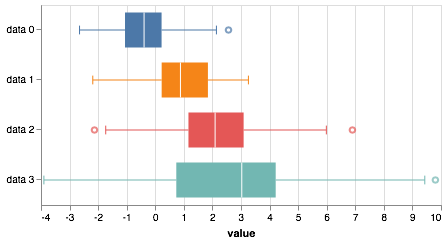

In [4]:
box = altcat.catplot(df,
                     encoding=dict(y=alt.Y('variable:N', title=None),
                                   x='value:Q',
                                   color=alt.Color('variable:N', legend=None)),
                     transform='box')
box

In [5]:
type(box)

altair.vegalite.v2.api.LayerChart

We can independently specify properties of the box and whisker marks using the `box_mark` and `whisker_mark` kwargs. For example, say we wanted our colors to be [Betancourt red](https://betanalpha.github.io/assets/case_studies/principled_bayesian_workflow.html#step_four:_build_a_generative_model19).

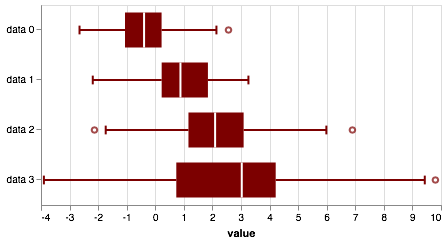

In [6]:
altcat.catplot(df,
               mark=dict(type='point', color='#7C0000'),
               box_mark=dict(color='#7C0000'),
               whisker_mark=dict(strokeWidth=2, color='#7C0000'),
               encoding=dict(x='value:Q',
                             y=alt.Y('variable:N', title=None)),
               transform='box')

## Jitter plot

I try my best to subscribe to the "plot all of your data" philosophy. To that end, a strip plot is a useful way to show all of the measurements. Here is one way to make a strip plot in Altair.

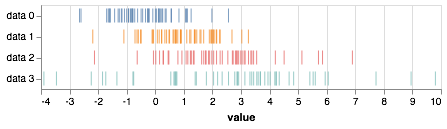

In [7]:
alt.Chart(df
    ).mark_tick(
    ).encode(
        x='value:Q',
        y=alt.Y('variable:N', title=None),
        color=alt.Color('variable:N', legend=None)
    )

The problem with strip plots is that they can have trouble with overlapping data point. A common approach to deal with this is to "jitter," or place the glyphs with small random displacements along the categorical axis. This involves using a jitter transform. While the current release candidate for Vega-Lite 3.0 has box plot capabilities, it does not have a jitter transform, though that will likely be coming in the future (see [here](https://github.com/vega/vega-lite/issues/396) and [here](https://github.com/vega/vega-lite/pull/4096/files)). Have a proper transform where data points are offset, but the categorial axis truly has nominal or ordinal value is desired, but not currently possible. The jitter plot here is a hack wherein the axes are quantitative and the tick labels and actually carefully placed text. This means that the "axis labels" will be wrecked if you try interactivity with the jitter plot. Nonetheless, tooltips still work.

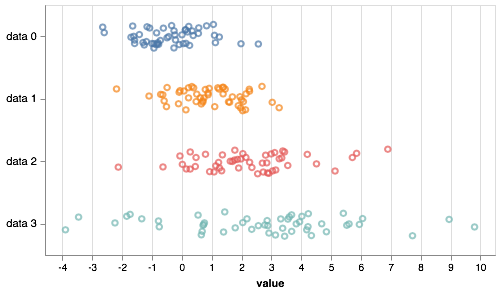

In [8]:
jitter = altcat.catplot(df,
                        height=250,
                        width=450,
                        mark='point',
                        encoding=dict(y=alt.Y('variable:N', title=None),
                                      x='value:Q',
                                      color=alt.Color('variable:N', legend=None),
                                      tooltip=alt.Tooltip(['dummy metadata:N'], title='breed')),
                        transform='jitter')
jitter

Alternatively, we could color the jitter points with the dummy metadata.

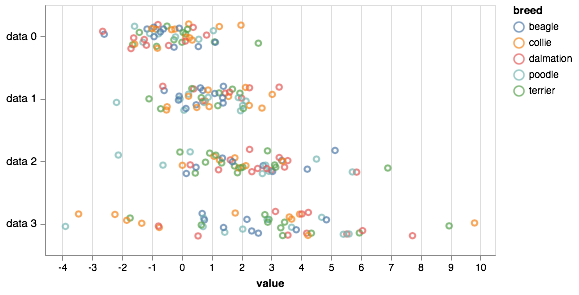

In [9]:
altcat.catplot(df,
               height=250,
               width=450,
               mark='point',
               encoding=dict(y=alt.Y('variable:N', title=None),
                             x='value:Q',
                             color=alt.Color('dummy metadata:N', title='breed')),
               transform='jitter')

### Jitter-box plots

Even while plotting all of the data, we sometimes was to graphically display summary statistics. We could (in Vega-Lite 3.0) make a strip-box plot, in which we have a strip plot overlayed on a box plot. In the future, you can generate this using Altais as follows.

```python
strip = alt.Chart(df
    ).mark_point(
        opacity=0.3
    ).encode(
        x='value:Q',
        y=alt.Y('variable:N', title=None),
        color=alt.Color('variable:N', legend=None)
    )

box = alt.Chart(df
    ).mark_boxplot(
        color='lightgray'
    ).encode(
        x='value:Q',
        y=alt.Y('variable:N', title=None)
    )

box + strip
```

The result may be viewed [here](https://vega.github.io/editor/#/url/vega-lite/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6ALQAbZskoAmOgDY6ABjoArWNwB2kADTgo8TQDNG1bGFAQIkCo2QB3MxctWUJ-GYDMixbudW7jAAmLGYALN56EAC+elG+UIHoeOiwyHiwjpEJSaIAjN4AnHKB8OweoQDshrkArLly6KGBFbnIofUViuyhoYaKZgDaWRBOfgmsqKgAnmCoaeiJyWaQBmISyDrDltboYqwbOLl0BQAcigWhcrkeFdLSFScecjXxYzsATozo7GIH2clgfpbOJbUZ+SCBCbTWbzRaYHAQ3YYPA8LSvcEUXb7MwiZQ9O4nGoVDy5Ar1MkFRRydHOD5fH5-REAoFjEFjMG0yGTGZzZJw5Z4ZDvT5CzZjKyYvZ-I7nDzSUInOTSOQqk4nCpyE407aYz7fX7LOGAyDA7Uc7Zc6G8hY5ZardZi8U7KU45TSDxPaS5YlnMm3GparYS9B6hmGnLG02goPjbkwvm2hGJMTI1GOt6S7E4XF0CoFAokmpe+XSIk1UIebXB0MGpMRll+Nl+c1WS082GJqDsZDoagGqtQTN-HMFmr50uPUKjskDun6xlGhvOJvOFuxq0dpYIwXC2zvdMYrF-ZS5UuXBWaqn5OUeQPiwch+m1-7oSOss0xiFQ9sJrdQHcivus5Dq6dAnKENSaqSU51BUFZyKEwGPvO4bMia77RveX5xta-IIt2vb9p+IGHHQp7hOUyrEvkaoPEhNYLvW6GNh+WFtvGNp-pAAF7getIkWAIhHKE7pPBcBTKmOZKKHeTq6k+jFoVG7KfuxuGdoiKZJGmSEutmRxXFRRSKLc0jnOB9EKahr5LpYK6WGu2Ebr+8L-kKgF8TqR6gVOVwqmONy3jcBRwZZKF1kpGEqWx34cXhUCENw3CBERWECUJdBeFSeaKtI4FqpSFRhWGEU2cxy6sU6ambq53HubxulZoJBmXJS6qUuENSBYhxHISVL5vixmFVbF6lcQRfYbI1w7KDJcgVMSeWlp06rlsVz5MmVynNqpo01Xa3BrLYnnBnpgJ0O6igBrkU7XOBeVFNSvUMdZg0VcNbzVS5Ar1aK01mLNigVqWkHujURalh44PrYpW1RTtMU4ftdZaSimgnQ+Z3KLeJmdIoXiVIotQFjDr22dElWfXt33br9QG9VjSgQR6IlQwUdS5DRCGk6Vb12ZT4JfZxtXJqm6P-fpF0BqcvrnNIEktD1aV9Rti7lfzH2C9TwvhqjOkM01GW5O1ypEyJ4OVAtPMDeTYD2SMu1IzT+iHQ6EuCcoiqVLUOVyOcftXNbm18xTmuctr8WQIlyWpXJ3nZsoC2nF6vqahJ+JB2r22ro7zk67Tu5-Qbx5kScZJThB4EyfUmdMdnDm5z++ddj2k0Y86htulcFRFuBlL5hbQO15FQ3RSNTvN5AE2xxm8ce7mpJwc8p6c4o9yB89Vm87b9vmI3cUafax3uzmJzE2fZl3CZ8vXMPcOjwj4955HR9TcXAOZZcRadF4GrunluQ74hztgLcOE9I7RxSm-ZWjNIJyA9M8D0RQpKKiATvUBFoI4aVFtpcW78cCezyvA3uio15UgrGg9Wocx5U3AYfV2x98HNToNdb0+YzimWlpWTe4UbZUJAWHTBdCuI8SLjAzuF0EIeBCsbKk6olRAyKjw-qwd0GCNbFgkRdN24CVkKDKGeZ7h3FOCZJ6ysXrb34bvRyQtI7T2gXHM6RsEIiUJGZaRMk2qUPrg7RGz8NL2J0XPZQ4M5QnEuvLCSlJSTePhjnPxTcIFJSgUEpxMoHhnHxrcCklwh7KNVnXOJDcEkHy4q-VJTU3QBirsWeWXVKJKPMVvPhPi94lLGrVcp7sTzSLBpUAqFZwhKzjhYlpRTfFP0SRpSBM9DxOLdKeeapxSRAyBgHF4+TYbAOsfvDpywZkONnmklh4F4I1Bku6G6IVYkP3iZM0ptVAknz0fmFUN05Qam8PAsxIzmmqKsRgjRwjOkMMOXMpqRwzwtHqFBdmt4fmz1Gf81pNjNEgqOmC-ic8MreDuNIs+QNSz5DqDc96NCtbAuWE8phOYrjgSghBS+tQEWHiRVncZbT7l7IRF0ml2NXFdW8A8LwXp6mko1uSsB-iuI4LRmiGlshl6QTLuOC4apyjiuoY-Wh0rHmt1mVi+ZxwSTM1PGXKu5ZpCaoEZKoRurdZi3leI4cRxOh5TZi4jq4MWVYrZYU25xSuXIwSskg1XkzoykgnBWonVzmW2tTs9pwbNKOoqSXTml5yxXWCg8MkGymm8ORRy1FlKUapvdsJOojwxxdU1Jk4ZiK-lGlyAC9R64pkyqRLgp1jimqyEkkSJU4TF6QREkAltKLdnJt5c6j+Dx5qc1cVcHoZwfVeT9QCCdxap3OxWKCtNZgjiQTEuDTo877iEnHa221QL7X4X1Zi8NlTcxr3dJSIGFYY3SKvZOpNu7RH01naROQBZwm4vBldcJlQf3br-ZPWV+sgNgFkN4K6FwFSWuVFazZr0t0BomTqjterCKPtOhCzKElbzhPzBqGRVscO8zw2S7VFK70uwxQeghYFc2PAkuqd53pAEMYGkxiVLGpVEYOhx92irTm0X7uct9+bfmFubde8TdrJNlu7ZxsAR7TidAQgtXKBVsMFpUWp39Qb-3aIrRdbNaoU5vrVMbGD+HOWEYeT9QugHe3SgupUeUr7yLkjXdWJtEZRNaruZ57lIaY6kcxs+kyHRnjm09HcAMbnmMxdY1pluJHdM5jHMqFdZcrp1HLLJRtqnIvqdyxJrz97Ct2dvO6S4JIOEmSKNlsTDXNNNeyHrPBSHE5ryLIZcJkEZbKZqxZurVnYvJoObpo4j0Fq9zzGOY2ZmVPzc3fVwNS3d0zr86BOoU4yT1HVHKUkYWHwbtfFFm1Gnb35ajqGxLHcS7Rp2yZcGxtIK9ei0dvLg26o+d08oZexIVRmSKORL0wOXv9be+DlbMmyIwVqETK6pYvRCfMwUg7i2wdxY+wlorshjZbYzdcdm8CPTI8TdZ+DXa5VQ4o+WWocDgp+1vA21lEWSewdZ0kyn3SwJTfKPNIGgqoPM8Be28H1KkNHCeCqFUGoAzPHzHKRXbanLvYx3ypQVwPGlgkvLBCmWDc3uV+TgDq3jgQR6HKEycp2hXAKHb17Dvk2q7O1xyoIUbhwVBiZdoGrhPB2eyz47k8neY6pDJAXtFHgIXu3OfbT3DsEbJ8tz7zuy61HKD-EKY4qS+9R-73dCGRtB-nvA4dBYJIgaJI9avoPGvk9O0c59l2y6V4vXLp4Xf8894Dw+zn1w3kh-CcSfGXVZtC9qyL9zJa2MQ48ifMbElI9eCm5SXbc3ie59J5P3dgf+8zTIpzPjwqL2c3lOPjzBe6-s8Q43jwUsii3GuDrucHmq-pvu9tfuCiXEqPkETKeIYlRGXCATupPH3hAZ4EoHlNfFeDcFeNVqvjnnpnnm-pfsgfupjtcCKjbgqGfI5o0ntmfgQRfgNo7rZjSjKPmMzJcCsrcMZogXBnYtPrvkoNEoqOUGHlDNdlnvJGvufqLgnpHEnkwtjFDPBISvLGeDJLQaflsnHkrkbuDigYahIhXO0JSAGETA8ESFDLwWLvQtJkwv2tdAzldHBOODcNYXIQEgIUwkcPkLPrIo8HcGaifngfQToYbrYtMkXpLniuqJDAqPKFDGOLgb6sLjIRvkgS-KQYoRdKJBBBcOUJUNUkqO4e-iQXYaNscFcvcDCmqBzBvETtoYQaAejlEfYUoE8MbJqEstIsnILikdIQwbIaUfISwWrmBN8pXuSJbOzITnQVstIE0Rkdgp-g3jfmYLIOUESC0FDAUWvB1EAgsYwWjuTuAYYX8D-psYzhBNlBgT1jHkaIcUMcQSMZDsnp+tbgFFSNUQcYsXwZERLm0SBgStcJDIDkWH0euqkchr8TYWUlkRUeYRcOQvLFSM8J0D7vcRGI8ekX8Z2sNj2msTgLIPmKSGcD0IzmZEWD8UcbXmzvibpnotIpUDeLBOetSU8UwVPi1tkVci0N8nyaetduyTibCbVAoUhrIIqBcP-sqOEh6O1sKTlt3pybuibkhqECwv7CSHSllAWNwg0a9NiUqRPiqXSeWkwjUGBF1IPmvPCiBpISrPMTCR4eNF4Uhj-vjC5iYrKFDJqCvv0fgUaX1sqccYXgCUhiINTktEUCJP-GfLBIqcGSaaGTZq8Uwj-vkHxlDFSE8OEmfImSDsmbSZkeUY3pClAcQvNJcucskZCQMUGYWUQaaeLikoIfAvDiieqOBOHrWeFvWc6cMRpOKY3soAWIvAEVAS0CqgWSjiGcWZ4dyWMVDCXuctCn6HcMEQGfQQ2bOUWXob3vCY3tTj0AqGSMQhcH7L2Q9lCTufHoOa6YuY3hqZfHcGibcJREDpiQCLeboREVommRGbNAhGsrUKXofjdA6Y9tCTSfuVyW3Jjv6PIk8CtPjEvjOXec8csfSe7D-lhovpBKeASLUJuXWYGQOZhf+TvkwgoCqsqPzmSHKIguhb+WilJm7N4UoMKqBdBNaSusxeEaxQXFRe6VjieRWNmrkn7P6aRdueRc2bYexWMcfh6FtsetcBnF+a+D+QJaWkNuaSJeWH-GesZDcGcFednrJTBX+cRvBRaWRJ1vKVOFtpSPqXMYaXJSmYnqMSOXQNcVOG1ldKzHmBCX2WRVZYJfFq2W0WcAGGZLxvNDdiRaFZZRyZ5S2WGmRiXBenlI8F4J0V6C0PxfbrBR-thRxcYoKl1D-HmCSEVX7iVZPGqY3padCj3IqC0OzEWLMVoe5eFbpRTlFRKZUT3PAkiVQfGppdBalfOXifpd-r5eEEAWzNfPDuZVIWFdNQ1fwY+YSedIUYotRpfEKhcHVTXltVhXNbtQZASODGXO3q7kSKdXOedZRQ1BxRqHKDlSJPAmvJepNdpcVdZd5sJWWccIYisgAd4BWKgv9R5TNeiopaDQtJdvjsSMydBrDX1VvsOVdZlHKBJMbISDtl4K5T1bzADfVUDdphzpjuBHUAAqOoqBfJoSEU6Vje9vXgSagUSZIgWD3BkuqsSpBTeXDS9QjYwiJbeNAcufvvKKSNJclWzZtVTW5ABT5XmKSO6OElrYSARU9XuSrSmjptERwtIjsZqOXlXpjcrRFdvm9WMXdMbNItdJ0OWG4dbSKS6TZRlUlv5vae6ucPkBWCSD3PrU2Wlf8YNaDfBFdvfgGOWO0EAh4KLYbTjdzchsNaup0JUECZ+QabzMnezSrm6T5VBE8EDDdD0JagqEnSnbbU1btYnM-tktcPjJbpqLXUXeTpzbphmQYiBsHcoSDCFdeQMYXTbf1acU+v5tIglU4beJ8iTJNePZ7febVA3enT-vNDWs8I8ISJdlScvXXZPSXbtXoj9V1EtHUvLUlaPfgSvcaeHfDQ6sbXZUWFWkPkvLmaTaza9A-UmU-WLWxRLY3pGQFhXdAVkkUHCp3RPVvhvWcesVaRnjcOCeDCdUfV3dOoebtT-uhiJL0ass8I9Zg3A8bq0UhpaeEKHgGO0N4L6SPRZVsv-Y2c0eTgg9PUg-jK8mfFcJge0ArXffQSw7uYA4bQYZw6RBkiieZKeF1GtY6X-cfVvj3e7BqU7bDmwrDnNLA6vRReLV9gJAUGBBXbWkQ3GoI0w0o1g6qRQ0+fIOBF4ESIHaSOwro4-Ww9g6WbtTmCNUTPCp7kCXmO4wA546VZdenc+Z6PzoDsBRJCE6w0sa9WIqA66izOetvR-Qk6I2E41XY43bmDlZzBqIZJqGZN1b-QXco2AafZE2BN9SaprROGvNkxhfJck75rtRqR6LreSeWOWMgpY+tcI9U+DmnYgzzQ8DdGYYykULlcLWPaM8wWrbtScMcCQibIvN6LfVY1UzY2aa-eqegeZMsoFn6EM4o3s2Q+Dqo9kW7R7kkaBU8JcK0yxSfTtenRsUMh3q3v03cfnQNCI20xHbNYc-NeDP-OEAvh3vcK8zpVvhI5lTiEcPSjdOcK7assqnC4Dbbbc4BbmHKcTLdXcP6Bc1BUC28yoysVzRM2ABUIU9LHjK4+cjOKQ3o+0wY0VursDB9fUiy3nW5Vc+yyC2Kd5bg5lK3SFAlWfFdkzmyx40k6Kys589xgtObvkHE65vK6E4q1SrU7S4nN6hrmqCXiBt6Ni5TbbYi77TiD-nkabKcAPNdtDNq4k7iUqyDeK-iIUWSLUahu6Ba2dYbVPUizzcbOpSFLRaQqWIG89eIzg5vfIEnMWFlO3sE66zk7qzygm7S8+fKCy+bB3lVrGwbbbeM5I2AJaReQVISK7eUBiQC8HBS-C+9uW6G2ABcdrgAZbB6BDAs-fUs8mni43goIFaXnUrQ0zSW2I-Xfk+nZaX7K+nIhrghBU1ucw4OydjmxW1vd4JzN6LlQvQWIw8Mxu-s+lYY9ij-uamOL5B3tImuzJWe9cycfqzu2BJ7lDTcNUcjdO7ky8Z6+ndDu-VsWzLAeqK01kAALqxDxCQBiDoBTCig4BDD9abSZBYQaDoBzDWRCSFDFClBl7VB1ANBNAtBtAdBdA9B9CEGQDIAaAGCBCMAaCmA4COQAAeGH94UAxgyAYggQywIEA4VgeAUwhAjIAAjqwOgBoCiMkCiFQPwo2VYFMFx1hLx-x4J4o8J-+MwM+BoKwGsDp9xGJ4yBoNwKgMx7sEp3bK0pABgO8AANZqfgirDcD7gIgSDUD4DUDvCIftyifidUrcDseEBiDcB4BWJZD2TmjodsefhYc4elR4f+wlBlCVDEf1CNDNCtBe6dDdC9BqJvD0eMfMeseANucedP1WAacCcIinsYxWC-DUD0d1dgAGdGcxgiemfLDmeWdYdiA2e7xWCcfxfcc8e2Caf1feTGeBeSfSeyfMDaSKcxjDdQCqdjfceQC1dacvSzd6d-AddiCzc9cIh9dWeDerd2cOfOebdvDcCEDoDwDMAbfnQ-20hzf7LcDMeRfAjRd6AwdRBAA).

The strip-box plots have the same issue as strip plots and could stand to have a little jitter. Jitter-box plots consist of a jitter plot overlayed with a box plot. Why not just make a box plot and a jitter plot and then compose them using Altair's nifty composition capabilities as I did in the plot I just described? We cannot do that because box plots have a truly categorical axis, but jitter plots have a hacked "categorical" axis that is really quantitative, so we can't overlay. We can try. The result is not pretty.

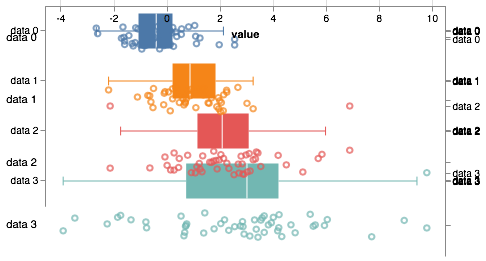

In [10]:
box + jitter

Instead, we use `'jitterbox'` for our transform. The default color for the boxes and whiskers is light gray.

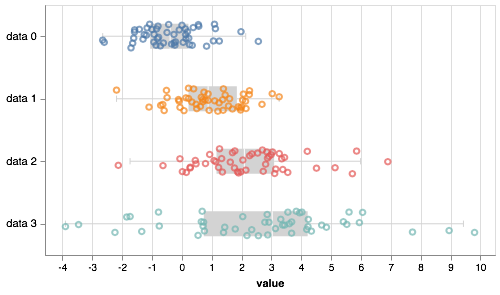

In [11]:
altcat.catplot(df,
               height=250,
               width=450,
               mark='point',
               encoding=dict(y=alt.Y('variable:N', title=None),
                             x='value:Q',
                             color=alt.Color('variable:N', legend=None)),
               transform='jitterbox')

Note that the `mark` kwarg applies to the jitter plot. If we want to make specifications about the boxes and whiskers we need to separately specify them using the `box_mark` and `whisker_mark` kwargs as we did with box plots. Note that if the `box_mark` and `whisker_mark` are specified and their color is not explicitly included in the specification, their color matches the specification for the jitter plot.

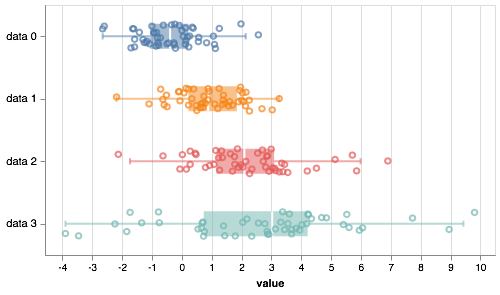

In [12]:
altcat.catplot(df,
               height=250,
               width=450,
               mark='point',
               box_mark=dict(strokeWidth=2, opacity=0.5),
               whisker_mark=dict(strokeWidth=2, opacity=0.5),
               encoding=dict(y=alt.Y('variable:N', title=None),
                             x='value:Q',
                             color=alt.Color('variable:N', legend=None)),
               transform='jitterbox')

## ECDFs

An empirical cumulative distribution function, or ECDF, is a convenient way to visualize a univariate probability distribution. Consider a measurement *x* in a set of measurements *X*. The ECDF evaluated at *x* is defined as

ECDF(*x*) = fraction of data points in *X* that are ≤ *x*.

To generate ECDFs colored by category, we use the `'ecdf'` transform.

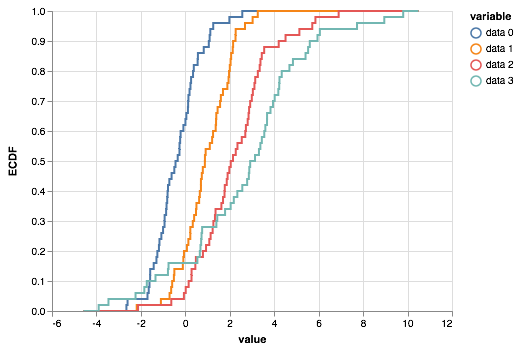

In [13]:
altcat.catplot(df,
               mark='line',
               encoding=dict(x='value:Q',
                             color='variable:N'),
               transform='ecdf')

Note that here we have chosen to represent the ECDF as a line, which is a more formal way of plotting the ECDF. We could, without loss of information, plot the "corners of the steps", which represent the actual measurements that were made. We do this by specifying the mark as `'point'`.

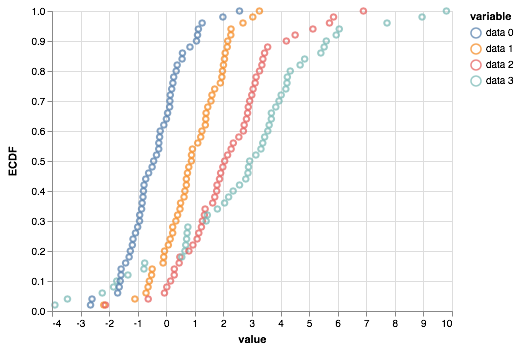

In [14]:
altcat.catplot(df,
               mark='point',
               encoding=dict(x='value:Q',
                             color='variable:N'),
               transform='ecdf')

This kind of plot can be easily made directly using Pandas and Altair by adding a column to the data frame containing the y-values of the ECDF.

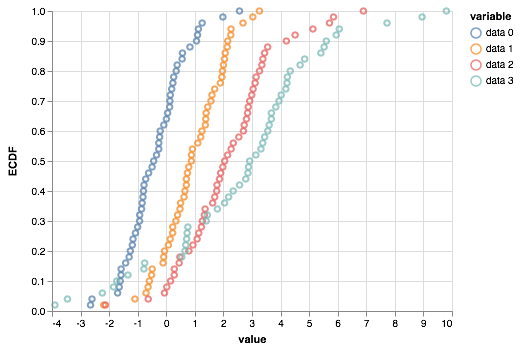

In [15]:
df['ECDF'] = df.groupby('variable')['value'].transform(lambda x: x.rank(method='first') / len(x))

alt.Chart(df
    ).mark_point(
    ).encode(
        x='value:Q',
        y='ECDF:Q',
        color='variable:N'
    )

This, however, is not possible when making a formal line plot of the ECDF.

An added advantage of plotting the ECDF as dots, which represent individual measurements, is that we can color the points. We may instead which to show the ECDF over all measurements and color the dots by the categorical variable. We do that using the `colored_ecdf` transform.

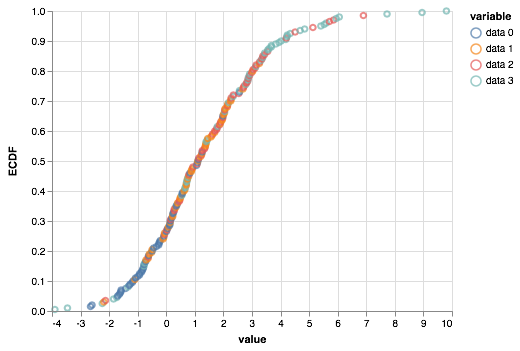

In [16]:
altcat.catplot(df,
               mark='point',
               encoding=dict(x='value:Q',
                             color='variable:N'),
               transform='colored_ecdf')

## ECCDFs

We may also make a complementary empirical cumulative distribution, an ECCDF. This is defined as

ECCDF(*x*) = 1 - ECDF(*x*).

These are often useful when looking for powerlaw-like behavior in you want the ECCDF axis to have a logarithmic scale.

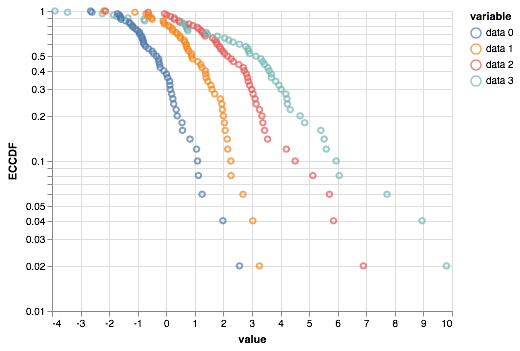

In [17]:
altcat.catplot(df,
               mark='point',
               encoding=dict(x='value:Q',
                             y=alt.Y('ECCDF:Q', scale=alt.Scale(type='log')),
                             color='variable:N'),
               transform='eccdf')